<a href="https://colab.research.google.com/github/MUXULCRACK/Challenge2_Data_Science/blob/main/TelecomX_LATAMnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🔄 Importar libreria**

In [227]:
#import json
import pandas as pd

#**📌 Extracción**

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [228]:

#with open('/content/TelecomX_Data.json', 'r') as f:
  #  data = json.load(f)  # data es una lista de registros completos


In [229]:

df_T = pd.read_json('/content/TelecomX_Data.json', orient='records')
df_T = pd.json_normalize(df_T.to_dict(orient='records'), sep='_')

df_T.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#**🔧 Transformación**

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

##**Conoce el conjunto de datos**

In [230]:
# Visión general con conteo y tipos
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [231]:
# Tipos exactos por columna

df_T.dtypes


,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [232]:

# Vista rápida de registros
df_T.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##**Comprobación de incoherencias en los datos**

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

###**Valores ausentes**

In [233]:
df_T.select_dtypes(include='object').apply(lambda vacio: vacio.eq('').sum() + vacio.str.isspace().sum())

,0
customerID,0
Churn,224
customer_gender,0
customer_Partner,0
customer_Dependents,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0
internet_OnlineSecurity,0
internet_OnlineBackup,0


In [234]:
df_T.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [235]:
df_T.isna().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


###**Revision de datos duplicados en el ID**

In [236]:
# Revisar si hay datos duplicados
print("Duplicados en'customerID':")
print(df_T.duplicated(subset=['customerID']).sum())

Duplicados en'customerID':
0


In [237]:
dup_count = df_T.duplicated().sum()
print("Duplicados:", dup_count)


Duplicados: 0


###**Revision de de errores de formato e inconsistencia de categorias**

In [238]:
print(df_T.dtypes)


customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total         object
dtype: object


In [239]:
df_T.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [240]:
import pandas as pd

# Conversión explícita de tipos para columnas existentes
df_T = df_T.astype({
    'customerID': 'object',
    'Churn': 'string',
    'customer_gender': 'category',
    'customer_SeniorCitizen': 'int64',
    'customer_Partner': 'string',
    'customer_Dependents': 'string',
    'customer_tenure': 'int64',
    'phone_PhoneService': 'string',
    'phone_MultipleLines': 'string',
    'internet_InternetService': 'category',
    'internet_OnlineSecurity': 'category',
    'internet_OnlineBackup': 'string',
    'internet_DeviceProtection': 'string',
    'internet_TechSupport': 'string',
    'internet_StreamingTV': 'string',
    'internet_StreamingMovies': 'string',
    'account_Contract': 'category',
    'account_PaperlessBilling': 'string',
    'account_PaymentMethod': 'category'
})

# Conversión de cargos a numérico (float64)
df_T['account_Charges_Monthly'] = pd.to_numeric(
    df_T['account_Charges_Monthly'],
    errors='coerce'
).astype('float64')

df_T['account_Charges_Total'] = pd.to_numeric(
    df_T['account_Charges_Total'],
    errors='coerce'
).astype('float64')

# Verifica el resultado
print(df_T.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   object  
 1   Churn                      7267 non-null   string  
 2   customer_gender            7267 non-null   category
 3   customer_SeniorCitizen     7267 non-null   int64   
 4   customer_Partner           7267 non-null   string  
 5   customer_Dependents        7267 non-null   string  
 6   customer_tenure            7267 non-null   int64   
 7   phone_PhoneService         7267 non-null   string  
 8   phone_MultipleLines        7267 non-null   string  
 9   internet_InternetService   7267 non-null   category
 10  internet_OnlineSecurity    7267 non-null   category
 11  internet_OnlineBackup      7267 non-null   string  
 12  internet_DeviceProtection  7267 non-null   string  
 13  internet_TechSupport       7267 n

##**Manejo de inconsistencias**

*cambiamos a string la columna Churn*


convertir a Nah

In [241]:
df_T['Churn'] = df_T['Churn'].replace(r'^\s*$', pd.NA, regex=True)


In [242]:
df_T['Churn'] = df_T['Churn'].astype('string')
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   object  
 1   Churn                      7043 non-null   string  
 2   customer_gender            7267 non-null   category
 3   customer_SeniorCitizen     7267 non-null   int64   
 4   customer_Partner           7267 non-null   string  
 5   customer_Dependents        7267 non-null   string  
 6   customer_tenure            7267 non-null   int64   
 7   phone_PhoneService         7267 non-null   string  
 8   phone_MultipleLines        7267 non-null   string  
 9   internet_InternetService   7267 non-null   category
 10  internet_OnlineSecurity    7267 non-null   category
 11  internet_OnlineBackup      7267 non-null   string  
 12  internet_DeviceProtection  7267 non-null   string  
 13  internet_TechSupport       7267 n

Aqui realizamos en la columna customer un cambio el cual quita comillas simples, las llaves del texto y pone en minusculas


In [243]:
df_T.head(31)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90


aqui para las siguientes columnas

##**Columna de cuentas diarias**

In [244]:
df_T['Cuentas_Diarias'] = df_T['account_Charges_Monthly'] / 30
df_T.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##**Estandarización y transformación de datos (opcional)**

In [245]:
# 1. Normalizar texto
df_T['Churn'] = df_T['Churn'].str.strip().str.lower()

# 2. Mapear a binario
df_T['Churn'] = df_T['Churn'].map({'yes': 1, 'no': 0})

df_T['Churn'] = df_T['Churn'].astype('Int64')
df_T.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#**📊 Carga y análisis**

##**Análisis Descriptivo**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [247]:
desc = df_T.describe()
print(desc)


          Churn  customer_SeniorCitizen  customer_tenure  \
count    7043.0             7267.000000      7267.000000   
mean    0.26537                0.162653        32.346498   
std    0.441561                0.369074        24.571773   
min         0.0                0.000000         0.000000   
25%         0.0                0.000000         9.000000   
50%         0.0                0.000000        29.000000   
75%         1.0                0.000000        55.000000   
max         1.0                1.000000        72.000000   

       account_Charges_Monthly  account_Charges_Total  Cuentas_Diarias  
count              7267.000000            7256.000000      7267.000000  
mean                 64.720098            2280.634213         2.157337  
std                  30.129572            2268.632997         1.004319  
min                  18.250000              18.800000         0.608333  
25%                  35.425000             400.225000         1.180833  
50%                  

##**Distribución de evasión**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

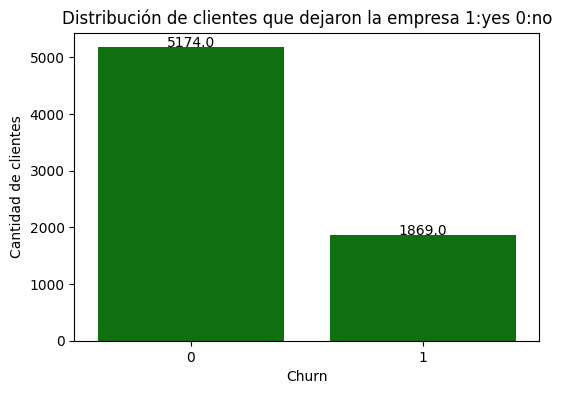

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df_T, order=['0','1'],color='green')
ax.set_title('Distribución de clientes que dejaron la empresa 1:yes 0:no')
ax.set_xlabel('Churn')
ax.set_ylabel('Cantidad de clientes')


# Opcional: añadir valores encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x()+p.get_width()/2, height + 5),
                ha='center')
plt.show()


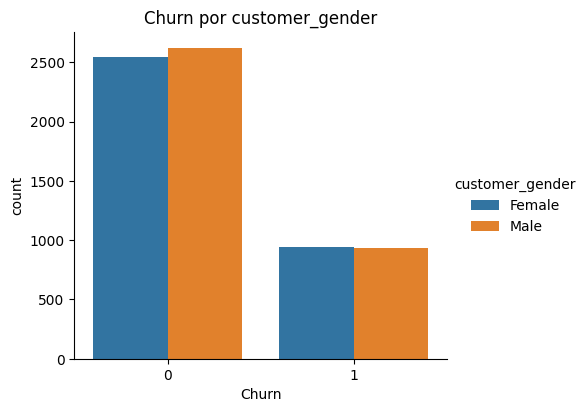

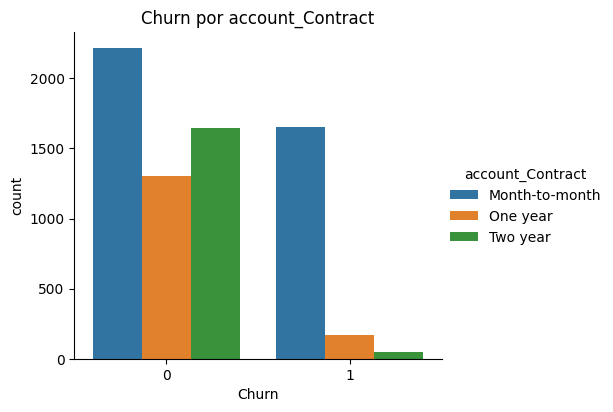

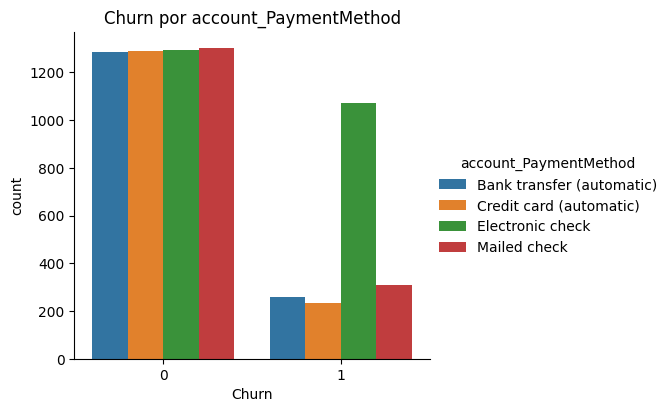

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['customer_gender', 'account_Contract', 'account_PaymentMethod']

for col in cat_vars:
    sns.catplot(x='Churn', hue=col, data=df_T, kind='count', height=4, aspect=1.2)
    plt.title(f'Churn por {col}')
    plt.show()


#📄Informe final